In [39]:
# Necessary Imports
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchinfo import summary

In [40]:
# Define the f function
def f(x, y):
    return x**2 + x*y + y**2

In [41]:
# Generate the data
np.random.seed(42)
data = np.random.uniform(low = -10, high = 10, size = (5000, 2))
inputs = torch.from_numpy(data).float()
targets = torch.from_numpy(f(data[:,0], data[:,1])).float().unsqueeze(1)

In [42]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, targets, test_size = 0.1, random_state = 42)

## Now, we will design the Neural Network as per the following architecture:

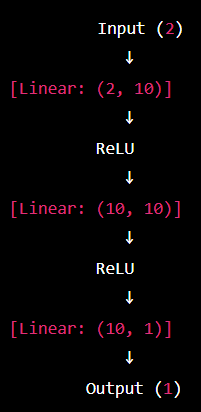

In [43]:
# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [44]:
# Initialize the network and optimizer
model = NeuralNetwork()
summary(model)

Layer (type:depth-idx)                   Param #
NeuralNetwork                            --
├─Linear: 1-1                            30
├─Linear: 1-2                            110
├─Linear: 1-3                            11
Total params: 151
Trainable params: 151
Non-trainable params: 0

In [45]:
# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.005)

In [46]:
# Train the network
num_epochs = 120
batch_size = 50
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    running_train_loss = 0.0

    # Train on mini-batches
    for i in range(0, X_train.shape[0], batch_size):
        inputs = X_train[i:i + batch_size]
        targets = Y_train[i:i + batch_size]

        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        running_train_loss += loss.item()

    # Compute the average training loss for this epoch
    train_loss = running_train_loss / (X_train.shape[0] / batch_size)
    train_losses.append(train_loss)

    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, Y_test)
        test_losses.append(test_loss.item())

#     # Print the loss for this epoch
#     print("Epoch {}/{} train loss: {:.4f} test loss: {:.4f}".format(epoch + 1, num_epochs, train_loss, test_loss))
    
    # Print the loss for this epoch
    if (epoch + 1) % 10 == 0:
        print("Epoch {}/{} train loss: {:.4f} test loss: {:.4f}".format(epoch + 1, num_epochs, train_loss, test_loss))



Epoch 10/120 train loss: 120.0232 test loss: 116.9667
Epoch 20/120 train loss: 34.8411 test loss: 36.1510
Epoch 30/120 train loss: 12.1477 test loss: 12.1718
Epoch 40/120 train loss: 8.5509 test loss: 8.0174
Epoch 50/120 train loss: 6.2693 test loss: 6.1356
Epoch 60/120 train loss: 4.2514 test loss: 4.3550
Epoch 70/120 train loss: 3.3421 test loss: 3.2641
Epoch 80/120 train loss: 2.7613 test loss: 2.6354
Epoch 90/120 train loss: 2.0960 test loss: 1.9767
Epoch 100/120 train loss: 1.7520 test loss: 1.6351
Epoch 110/120 train loss: 1.6088 test loss: 1.5625
Epoch 120/120 train loss: 1.4957 test loss: 1.4738


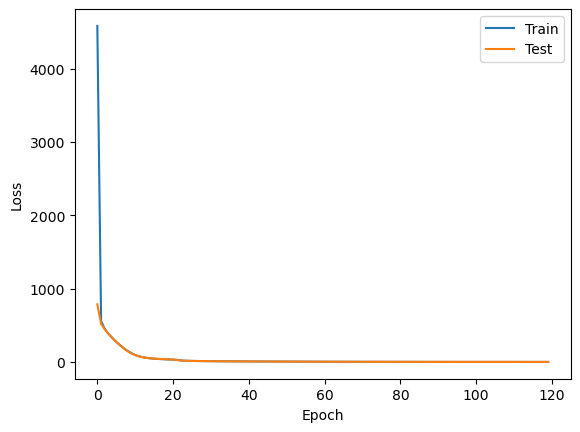

In [47]:
# Plot the train and test loss as a function of the training time
plt.plot(train_losses, label = 'Train')
plt.plot(test_losses, label = 'Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [48]:
final_train_loss = train_losses[-1]
final_test_loss = test_losses[-1]
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Test Loss: {final_test_loss:.4f}")

Final Training Loss: 1.4957
Final Test Loss: 1.4738
